In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
import imageio

In [4]:
import lanelines
import roadplane

from compgraph import CompGraph, CompGraphRunner
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

In [5]:
from newlanespipeline import computational_graph as cg
from newlanespipeline import parameters as cg_params
from roadplane import prepare_perspective_transforms_custom
from smooth import Smoother, GenericSmoother, GenericSmootherWithMemory, Memory, compute_diffs

In [6]:
cm = np.load('serialize/camera_matrix.npy')
dc = np.load('serialize/dist_coefs.npy')

In [7]:
CANVAS_SZ = (500, 1500)
M, Minv = prepare_perspective_transforms_custom(CANVAS_SZ)

In [8]:
test_images = [lanelines.open_image(f, convert_to_rgb=True) for f in glob('test_images/*.jpg')]
test_images_undist = [cv2.undistort(im, cm, dc) for im in test_images]

In [9]:
warped_images = [cv2.warpPerspective(im, M, CANVAS_SZ, flags=cv2.INTER_LINEAR) for im in test_images_undist]

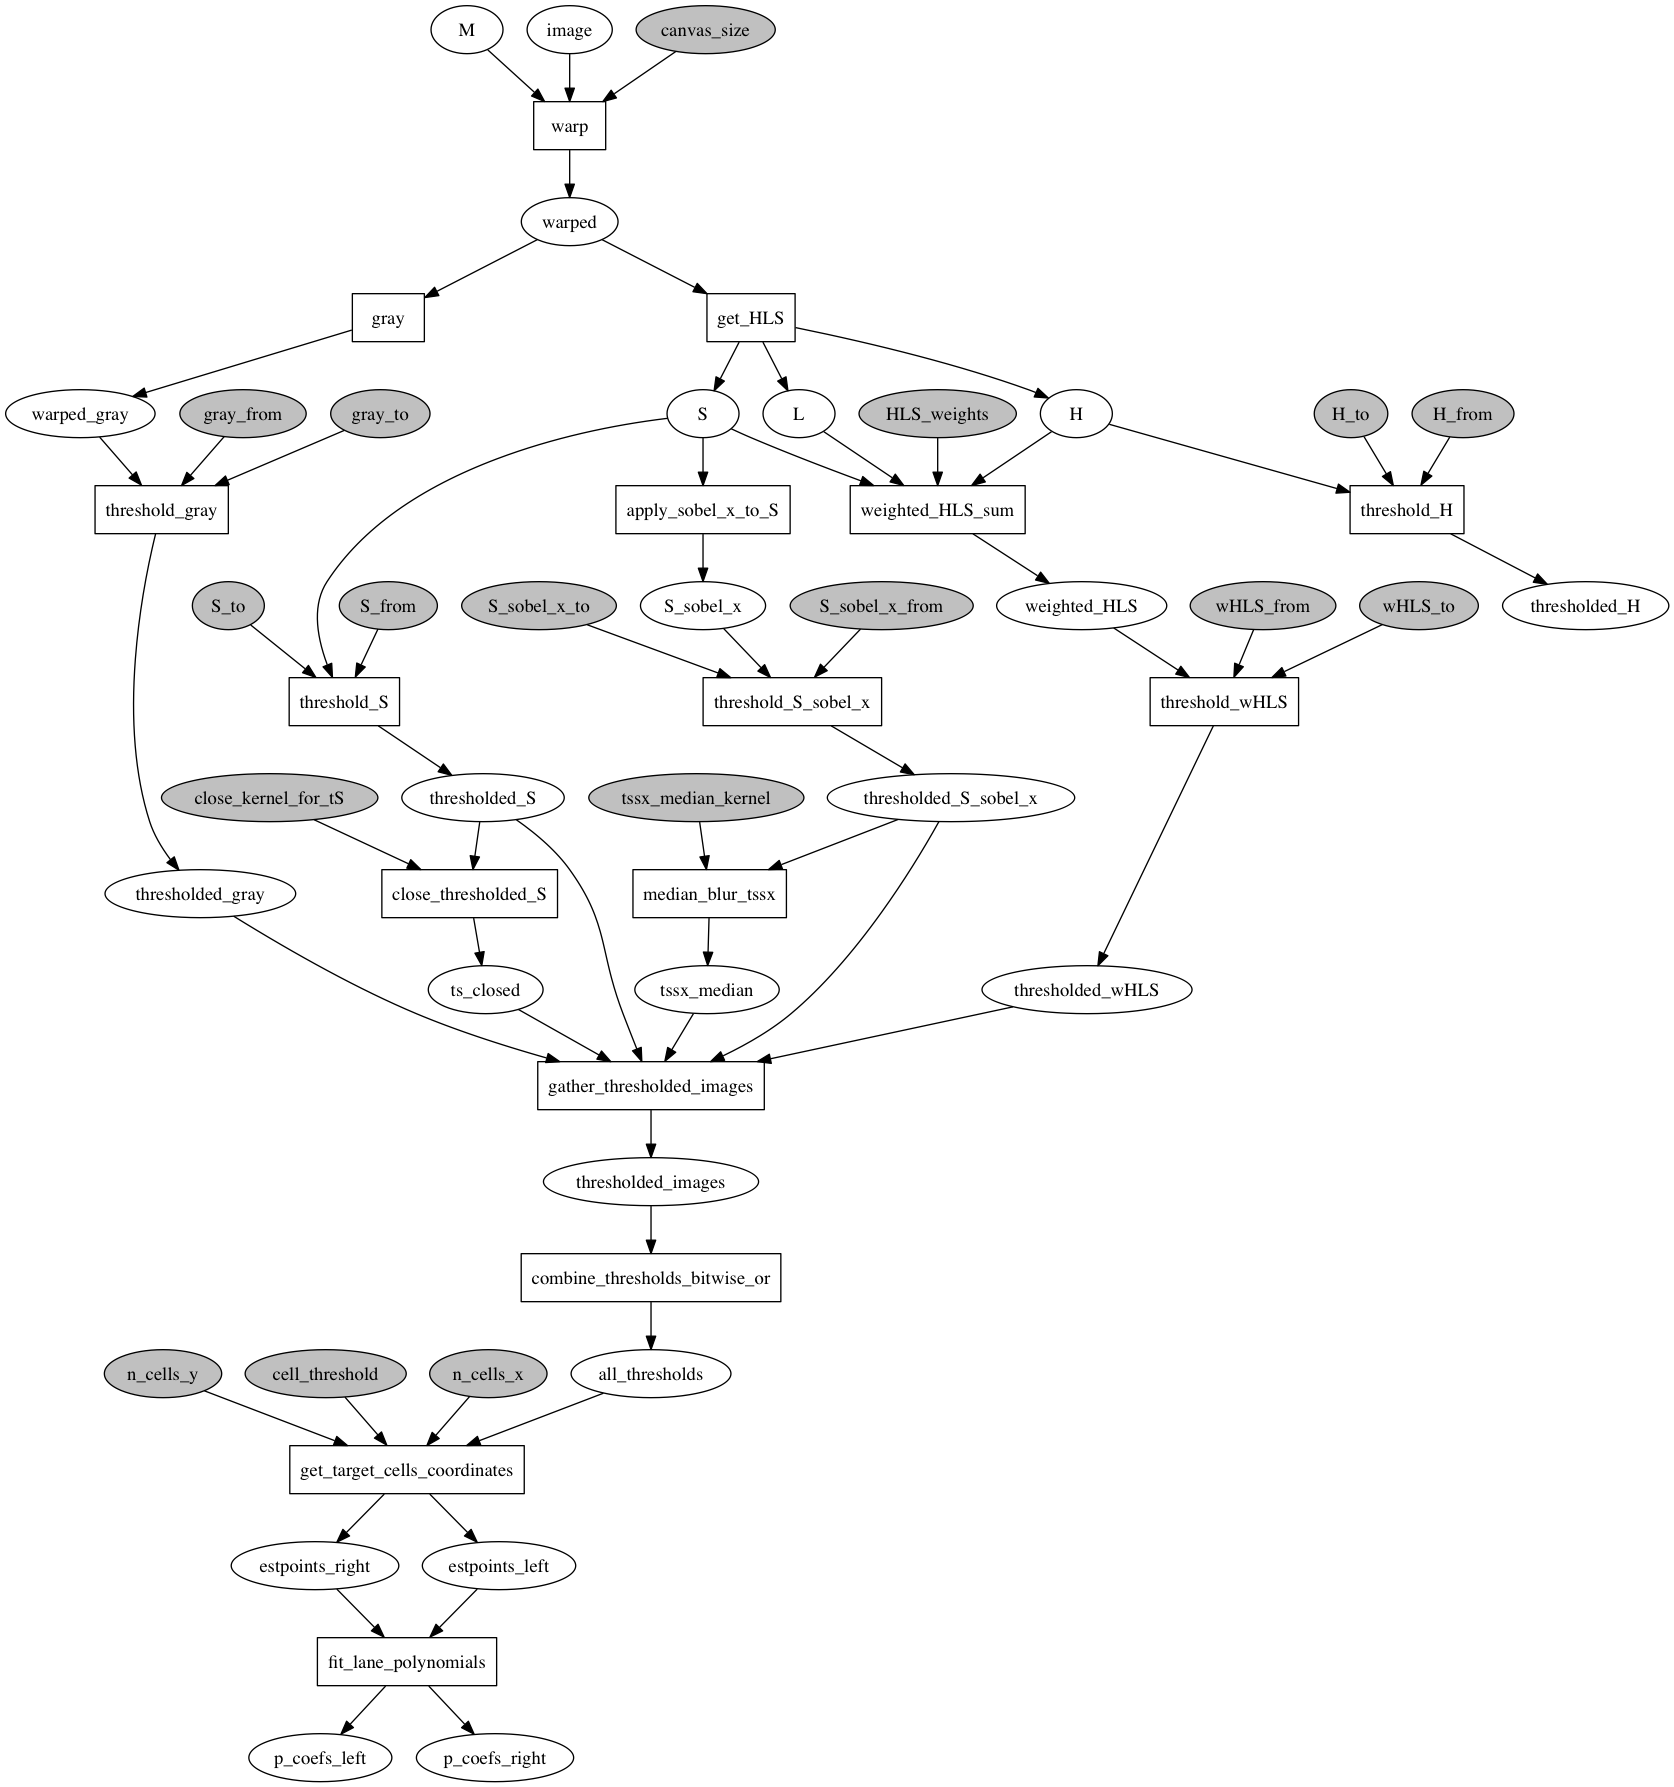

In [10]:
runner = CompGraphRunner(cg, frozen_tokens=cg_params)
nxpd.draw(runner.token_manager.to_networkx())

In [11]:
mx, my = lanelines.pixel_to_meter_ratios_custom()

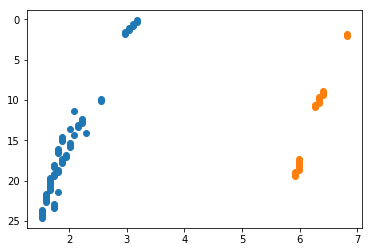

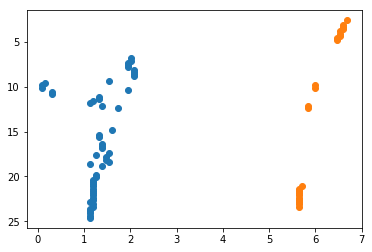

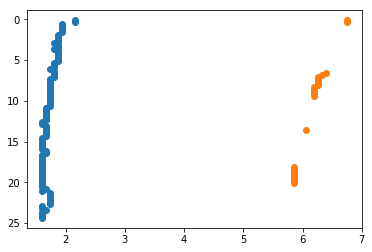

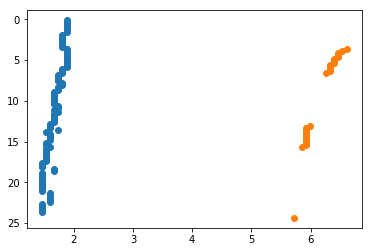

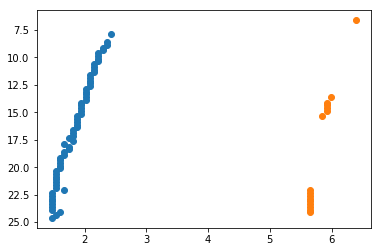

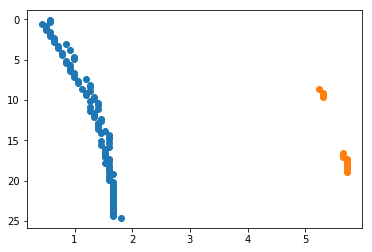

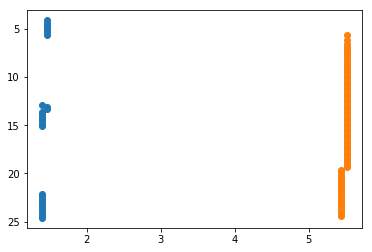

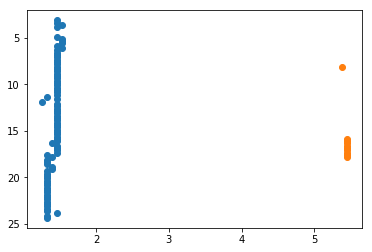

In [12]:
for i, im in enumerate(test_images_undist):
    runner.run(image=im, M=M)
    
    points_left = lanelines.pixel_points_to_meters(runner['estpoints_left'], mx, my)
    points_right = lanelines.pixel_points_to_meters(runner['estpoints_right'], mx, my)

    #coefs_left, coefs_right = fit_lane_polynomials(points_left, points_right)
    
    plt.figure()
    plt.plot(points_left[:, 0], points_left[:, 1], 'o')
    plt.plot(points_right[:, 0], points_right[:, 1], 'o')
    
    plt.gca().invert_yaxis()

In [13]:
for i, im in enumerate(test_images_undist):
    runner.run(image=im, M=M)
    
    # x= mx / (my ** 2) *a*(y**2)+(mx/my)*b*y+c

    test = (mx / (my**2))*runner['p_coefs_right'][0], (mx / my)*runner['p_coefs_right'][1], 0
    print(test)
    print(lanelines.curvature_poly2(test, runner['canvas_size'][1]*my))
    
    curv1, curv2  = lanelines.lane_curvature(
        runner['estpoints_left'], 
        runner['estpoints_right'], 
        mx, 
        my, 
        runner['canvas_size']
    )
    
    print(curv1, curv2)
    print()
    
    

(0.00097901168237398447, -0.071710780389686174, 0)
511.116035918
422.151033565 511.11457956

(0.0033067249488256865, -0.13546656192394177, 0)
151.409417343
152.14979125 151.409456893

(0.0014626632205051336, -0.075453266418160747, 0)
341.844951157
423.24569116 341.845096791

(0.0018531152975700552, -0.089938360116742694, 0)
269.818903812
2057.10474199 269.818866732

(0.0018560615735786193, -0.10121818482022472, 0)
269.41622981
335.950994408 269.416339277

(-0.0017637103810159494, 0.095245222736641086, 0)
283.514450791
220.585407321 283.514783627

(-0.00053736846371684897, 0.011976015002447667, 0)
930.769817843
2081.84583166 930.774660736

(-0.00089583110799774305, 0.030252396255198766, 0)
558.317906438
1494.17564722 558.316928492

